### <font color='red'> Laptop Price. </font>

In [1]:
import numpy as np
import pandas as pd

#### Importing Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold

## <font color='blue'> 1. Importing Dataset. </font>

#### Here we are reading the database test using the name "df_test" in the variable and the database train using the name "df".

In [3]:

import pymongo
import pandas
conn_str="mongodb://localhost:27017/?directConnection=true"
client=pymongo.MongoClient(conn_str)
mydb=client["bigdata"]
mycollection =mydb["laptoptest"]
lst=[]
for db in mycollection.find():
    lst.append(db)
df1 = pandas.DataFrame(lst)
df_test=df1.drop(['_id'],axis=1)


In [8]:
mycollection1 =mydb["laptoptrain"]
lst1=[]
for db in mycollection1.find():
    lst1.append(db)
df = pandas.DataFrame(lst1)
df=df.drop(['_id'],axis=1)

In [96]:
df=pd.read_csv("laptops_train.csv")

In [9]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Operating System Version
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,11912523.48,NaN
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7993374.48,NaN
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900,NaN
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,22563005.4,NaN
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,16037611.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42kg,24897600,10
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,1.95kg,10492560,10
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73kg,18227710.8,10
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04kg,8705268,10


#### Here we can see that we have categorical and continuous variables, we can also see that we have some null values

In [10]:
df.head(5)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Operating System Version
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,11912523.48,NaN
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7993374.48,NaN
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900,NaN
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,22563005.4,NaN
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,16037611.2,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              977 non-null    object
 1   Model Name                977 non-null    object
 2   Category                  977 non-null    object
 3   Screen Size               977 non-null    object
 4   Screen                    977 non-null    object
 5   CPU                       977 non-null    object
 6   RAM                       977 non-null    object
 7    Storage                  977 non-null    object
 8   GPU                       977 non-null    object
 9   Operating System          977 non-null    object
 10  Weight                    977 non-null    object
 11  Price                     977 non-null    object
 12  Operating System Version  841 non-null    object
dtypes: object(13)
memory usage: 99.4+ KB


In [12]:
df.describe()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Operating System Version
count,977,977,977,977,977,977,977,977,977,977,977,977,841
unique,19,488,6,18,38,106,8,36,98,7,166,639,4
top,Dell,XPS 13,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,2.2kg,9772308,10
freq,232,22,549,494,397,151,483,318,225,837,98,12,819


In [13]:
df.dtypes

Manufacturer                object
Model Name                  object
Category                    object
Screen Size                 object
Screen                      object
CPU                         object
RAM                         object
 Storage                    object
GPU                         object
Operating System            object
Weight                      object
Price                       object
Operating System Version    object
dtype: object

In [14]:
(df.isnull().sum()/len(df))

Manufacturer                0.000000
Model Name                  0.000000
Category                    0.000000
Screen Size                 0.000000
Screen                      0.000000
CPU                         0.000000
RAM                         0.000000
 Storage                    0.000000
GPU                         0.000000
Operating System            0.000000
Weight                      0.000000
Price                       0.000000
Operating System Version    0.139202
dtype: float64

#### Let's fill our null values ​​of the Operation System variable with Mode.

In [15]:
df['Operating System Version']=df['Operating System Version'].fillna(df['Operating System Version'].mode()[0])
df_test['Operating System Version']=df_test['Operating System Version'].fillna(df_test['Operating System Version'].mode()[0])

In [16]:
(df.isnull().sum()/len(df))

Manufacturer                0.0
Model Name                  0.0
Category                    0.0
Screen Size                 0.0
Screen                      0.0
CPU                         0.0
RAM                         0.0
 Storage                    0.0
GPU                         0.0
Operating System            0.0
Weight                      0.0
Price                       0.0
Operating System Version    0.0
dtype: float64

#### Here we are going to handle the Weight variable by removing the "kg" and leaving only numerical information.

In [17]:
df['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df_test['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df_test['Weight'].replace(to_replace='s', value='', regex=True, inplace=True)

In [18]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Operating System Version
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,10
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,10
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900,10
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.4,10
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42,24897600,10
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,1.95,10492560,10
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73,18227710.8,10
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04,8705268,10


In [19]:
df['Weight'] = df['Weight'].astype("float64")
df_test['Weight'] = df_test['Weight'].astype("float64")

#### Grouping Variables

#### Since we have the variables  Model Name, CPU and GPU that has many different values, we will need to group these variable to use them. Let's use the median Price to group these variable.

In [20]:
df['Model_name_avg'] = df.groupby(['Model Name'])['Price'].transform('median').round(2)
df['CPU_avg'] = df.groupby(['CPU'])['Price'].transform('median').round(2)
df['GPU_avg'] = df.groupby(['GPU'])['Price'].transform('median').round(2)

df_test['Model_name_avg'] = df_test.groupby(['Model Name'])['Price'].transform('median').round(2)
df_test['CPU_avg'] = df_test.groupby(['CPU'])['Price'].transform('median').round(2)
df_test['GPU_avg'] = df_test.groupby(['GPU'])['Price'].transform('median').round(2)

In [21]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Operating System Version,Model_name_avg,CPU_avg,GPU_avg
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,10,17779109.40,12707735.04,15996708.0
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,10,9148267.44,9148267.44,9323262.0
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900,10,3902209.74,7380360.00,9194328.0
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.4,10,17779109.40,22563005.40,22563005.4
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.2,10,17779109.40,17088645.60,17088645.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42,24897600,10,25511059.08,13880412.00,23839452.0
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,1.95,10492560,10,10492560.00,9429966.00,6126588.0
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73,18227710.8,10,15071940.00,15107508.00,15996708.0
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04,8705268,10,8091720.00,8705268.00,8705268.0


#### We are going to group them as follows:
- Value 0: Price above 25000000
- Value 1: Above or equal 20000000 and below 25000000.
- Value 2: Above or equal 15000000 and below 20000000.
- Value 3: Above or equal 10000000 and below 15000000.
- Value 4: Below 10000000.

In [22]:
def group(value):
    if value >= 25000000:
        return 0
    elif value >= 20000000  and value < 25000000:
        return 1
    elif value >= 15000000  and value < 20000000:
        return 2
    elif value >= 10000000  and value < 15000000:
        return 3
    else:
        return 4

In [23]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Operating System Version,Model_name_avg,CPU_avg,GPU_avg
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,10,17779109.40,12707735.04,15996708.0
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,10,9148267.44,9148267.44,9323262.0
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900,10,3902209.74,7380360.00,9194328.0
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.4,10,17779109.40,22563005.40,22563005.4
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.2,10,17779109.40,17088645.60,17088645.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42,24897600,10,25511059.08,13880412.00,23839452.0
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,1.95,10492560,10,10492560.00,9429966.00,6126588.0
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73,18227710.8,10,15071940.00,15107508.00,15996708.0
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04,8705268,10,8091720.00,8705268.00,8705268.0


In [24]:
df['model_name_group'] = df.apply(lambda x: group(x['Model_name_avg']),axis=1)
df['cpu_group'] = df.apply(lambda x: group(x['CPU_avg']),axis=1)
df['gpu_group'] = df.apply(lambda x: group(x['GPU_avg']),axis=1)

df_test['model_name_group'] = df_test.apply(lambda x: group(x['Model_name_avg']),axis=1)
df_test['cpu_group'] = df_test.apply(lambda x: group(x['CPU_avg']),axis=1)
df_test['gpu_group'] = df_test.apply(lambda x: group(x['GPU_avg']),axis=1)

In [25]:
mapping_df = df[['GPU']].copy() #Create an extra dataframe which will be used to address only the encoded values
mapping_df['cc'] = df[['gpu_group']] 
d1 = mapping_df.drop_duplicates('cc')
d1

,GPU,cc
0,Intel Iris Plus Graphics 640,2
1,Intel HD Graphics 6000,4
3,AMD Radeon Pro 455,1
14,Intel HD Graphics 615,3
17,AMD Radeon Pro 560,0


In [26]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Operating System Version,Model_name_avg,CPU_avg,GPU_avg,model_name_group,cpu_group,gpu_group
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,10,17779109.40,12707735.04,15996708.0,2,3,2
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,10,9148267.44,9148267.44,9323262.0,4,4,4
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900,10,3902209.74,7380360.00,9194328.0,4,4,4
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.4,10,17779109.40,22563005.40,22563005.4,2,1,1
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.2,10,17779109.40,17088645.60,17088645.6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42,24897600,10,25511059.08,13880412.00,23839452.0,0,3,1
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,1.95,10492560,10,10492560.00,9429966.00,6126588.0,3,4,4
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73,18227710.8,10,15071940.00,15107508.00,15996708.0,2,2,2
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04,8705268,10,8091720.00,8705268.00,8705268.0,4,4,4


## <font color='blue'> 2. Data Analysis. </font>

#### Categorical Variables.

#### Looking at our categorical variables, the predominance of data is from notebooks with 4 or 8 gigs of ram, with Windows operating system version 10.

<Axes: title={'center': 'Variable Operating System Version'}, xlabel='Operating System Version', ylabel='count'>

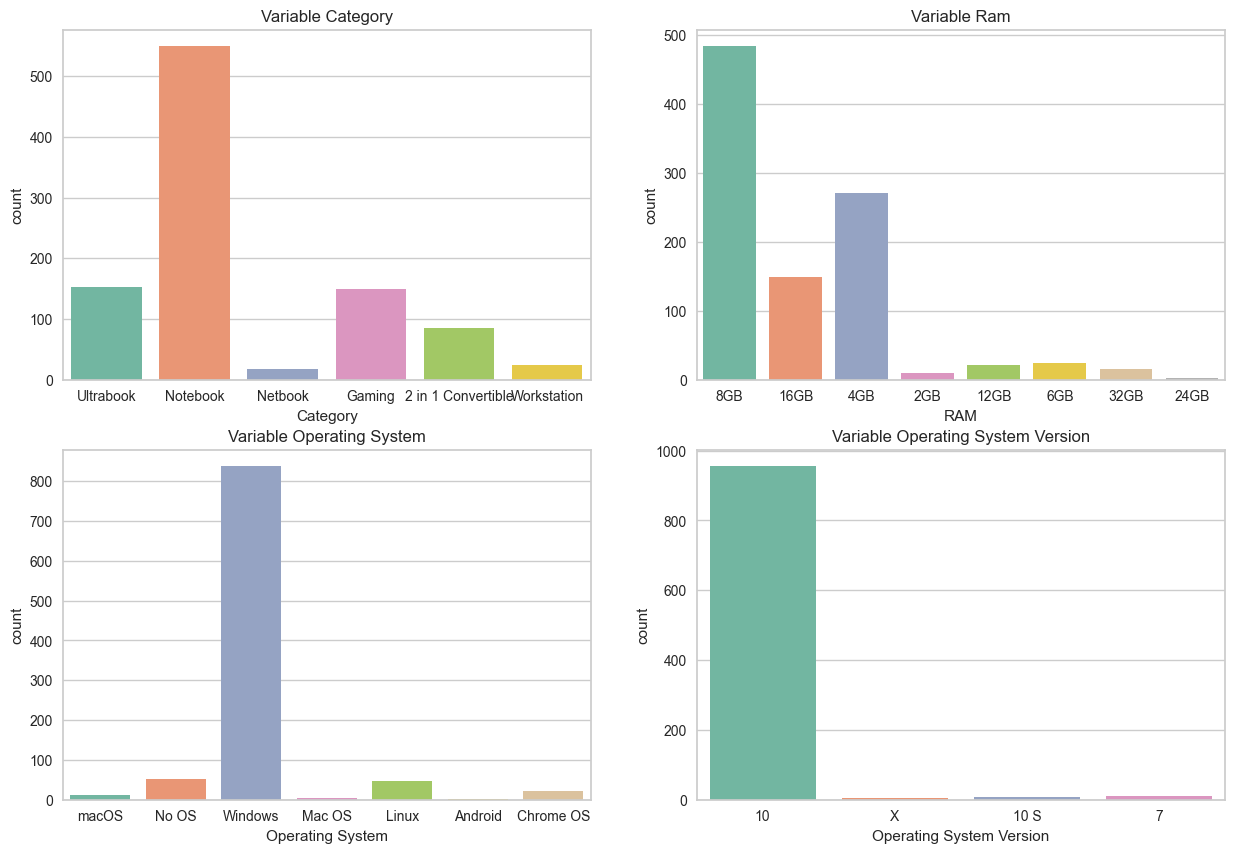

In [27]:
plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1)
plt.gca().set_title('Variable Category')
sns.countplot(x = 'Category', palette = 'Set2', data = df)

plt.subplot(2, 2, 2)
plt.gca().set_title('Variable Ram')
sns.countplot(x = 'RAM', palette = 'Set2', data = df)

plt.subplot(2, 2, 3)
plt.gca().set_title('Variable Operating System')
sns.countplot(x = 'Operating System', palette = 'Set2', data = df)

plt.subplot(2, 2, 4)
plt.gca().set_title('Variable Operating System Version')
sns.countplot(x = 'Operating System Version', palette = 'Set2', data = df)

#### When we look at the notebook brands we can see that we have predominance in some brands like Lenovo and Dell, same thing for the screen size with predominance in 15,6.

<Axes: title={'center': 'Variable Screen Size'}, xlabel='Screen Size', ylabel='count'>

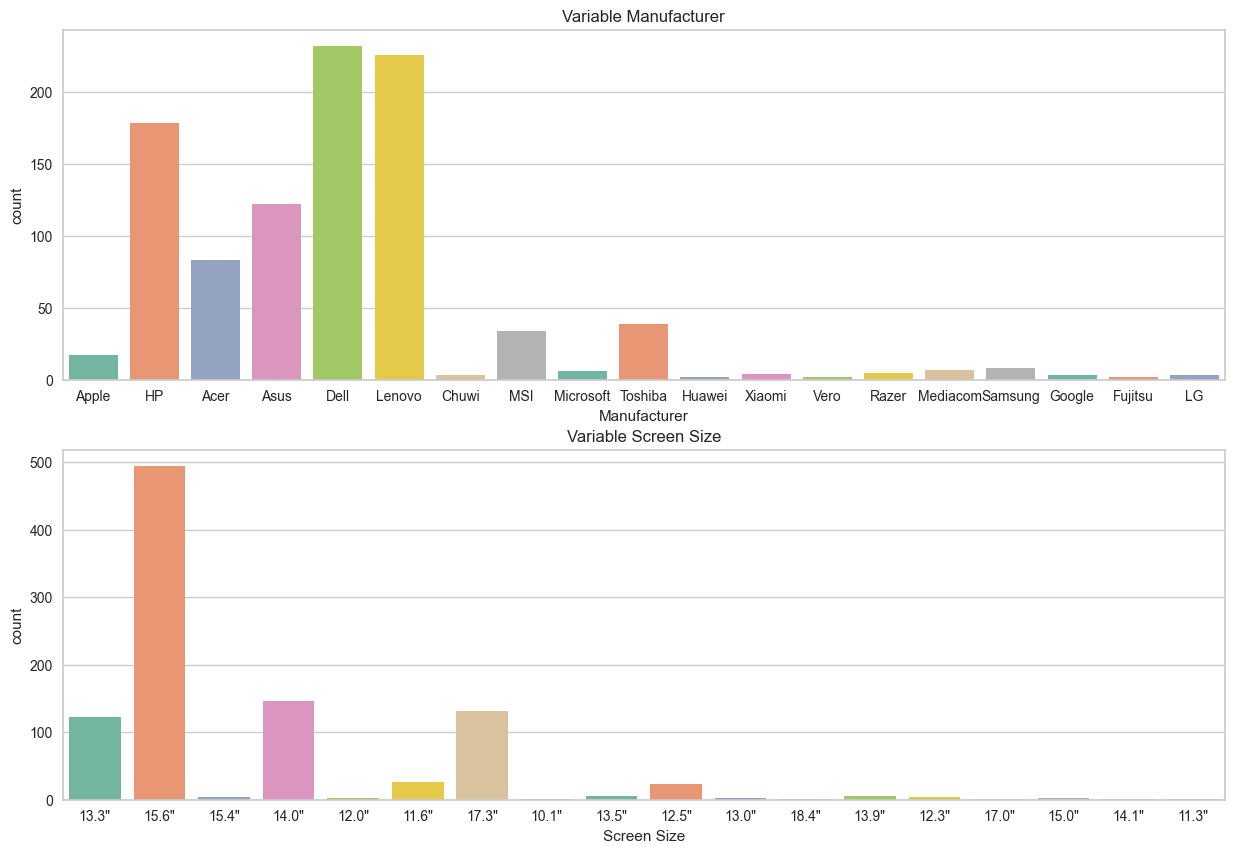

In [28]:
plt.figure(figsize = (15, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Manufacturer')
sns.countplot(x = 'Manufacturer', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Screen Size')
sns.countplot(x = 'Screen Size', palette = 'Set2', data = df)

#### Here we can see the top 10 Screen that we have in our data.

<Axes: xlabel='Manufacturer', ylabel='Screen'>

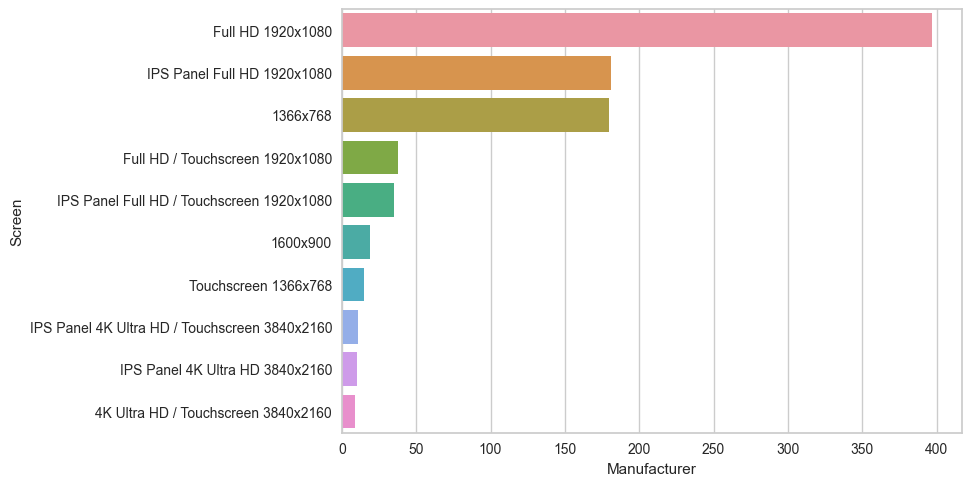

In [29]:
screen = df[['Screen','Manufacturer']].groupby('Screen').agg('count').sort_values('Manufacturer', ascending=False).reset_index()
sns.barplot(data=screen.head(10), x="Manufacturer", y="Screen")

#### Here we can see the top 10 CPU that we have in our data.

<Axes: xlabel='Manufacturer', ylabel='CPU'>

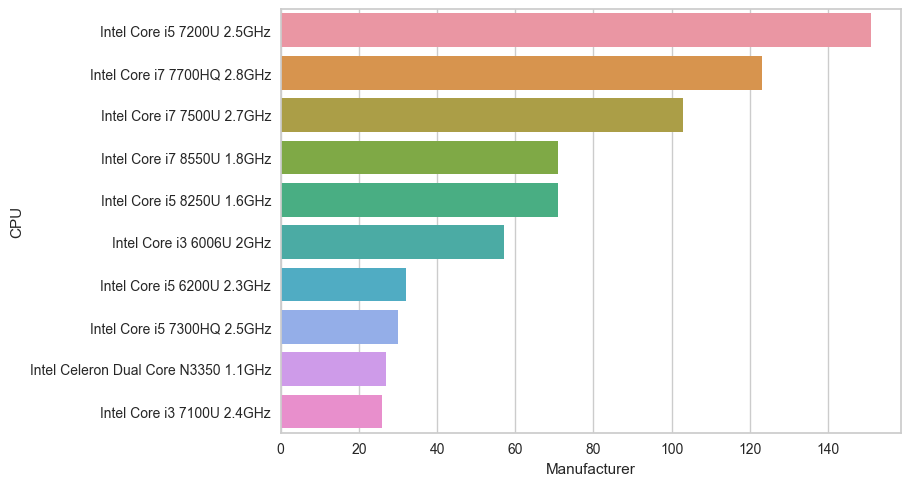

In [30]:
cpu = df[['CPU','Manufacturer']].groupby('CPU').agg('count').sort_values('Manufacturer', ascending=False).reset_index()
sns.barplot(data=cpu.head(10), x="Manufacturer", y="CPU")

In [31]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Operating System Version,Model_name_avg,CPU_avg,GPU_avg,model_name_group,cpu_group,gpu_group
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,10,17779109.40,12707735.04,15996708.0,2,3,2
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,10,9148267.44,9148267.44,9323262.0,4,4,4
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900,10,3902209.74,7380360.00,9194328.0,4,4,4
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.4,10,17779109.40,22563005.40,22563005.4,2,1,1
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.2,10,17779109.40,17088645.60,17088645.6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42,24897600,10,25511059.08,13880412.00,23839452.0,0,3,1
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,1.95,10492560,10,10492560.00,9429966.00,6126588.0,3,4,4
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73,18227710.8,10,15071940.00,15107508.00,15996708.0,2,2,2
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04,8705268,10,8091720.00,8705268.00,8705268.0,4,4,4


#### Here we can see the top 10 GPU that we have in our data.

<Axes: xlabel='Manufacturer', ylabel='GPU'>

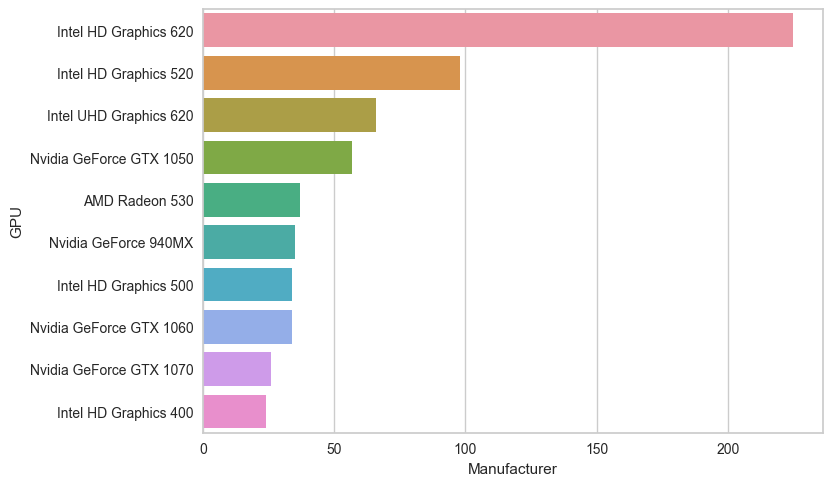

In [32]:
gpu = df[['GPU','Manufacturer']].groupby('GPU').agg('count').sort_values('Manufacturer', ascending=False).reset_index()
sns.barplot(data=gpu.head(10), x="Manufacturer", y="GPU")

In [33]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Operating System Version,Model_name_avg,CPU_avg,GPU_avg,model_name_group,cpu_group,gpu_group
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,10,17779109.40,12707735.04,15996708.0,2,3,2
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,10,9148267.44,9148267.44,9323262.0,4,4,4
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900,10,3902209.74,7380360.00,9194328.0,4,4,4
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.4,10,17779109.40,22563005.40,22563005.4,2,1,1
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.2,10,17779109.40,17088645.60,17088645.6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42,24897600,10,25511059.08,13880412.00,23839452.0,0,3,1
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,1.95,10492560,10,10492560.00,9429966.00,6126588.0,3,4,4
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73,18227710.8,10,15071940.00,15107508.00,15996708.0,2,2,2
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04,8705268,10,8091720.00,8705268.00,8705268.0,4,4,4


#### Continuous Variables.

#### Looking at our continuous variables we can see in our target variable that the more expensive the computer, the less values ​​we have, and when we look at the weight, we see that most of the data is in a normal distribution.

<Axes: xlabel='Price', ylabel='Count'>

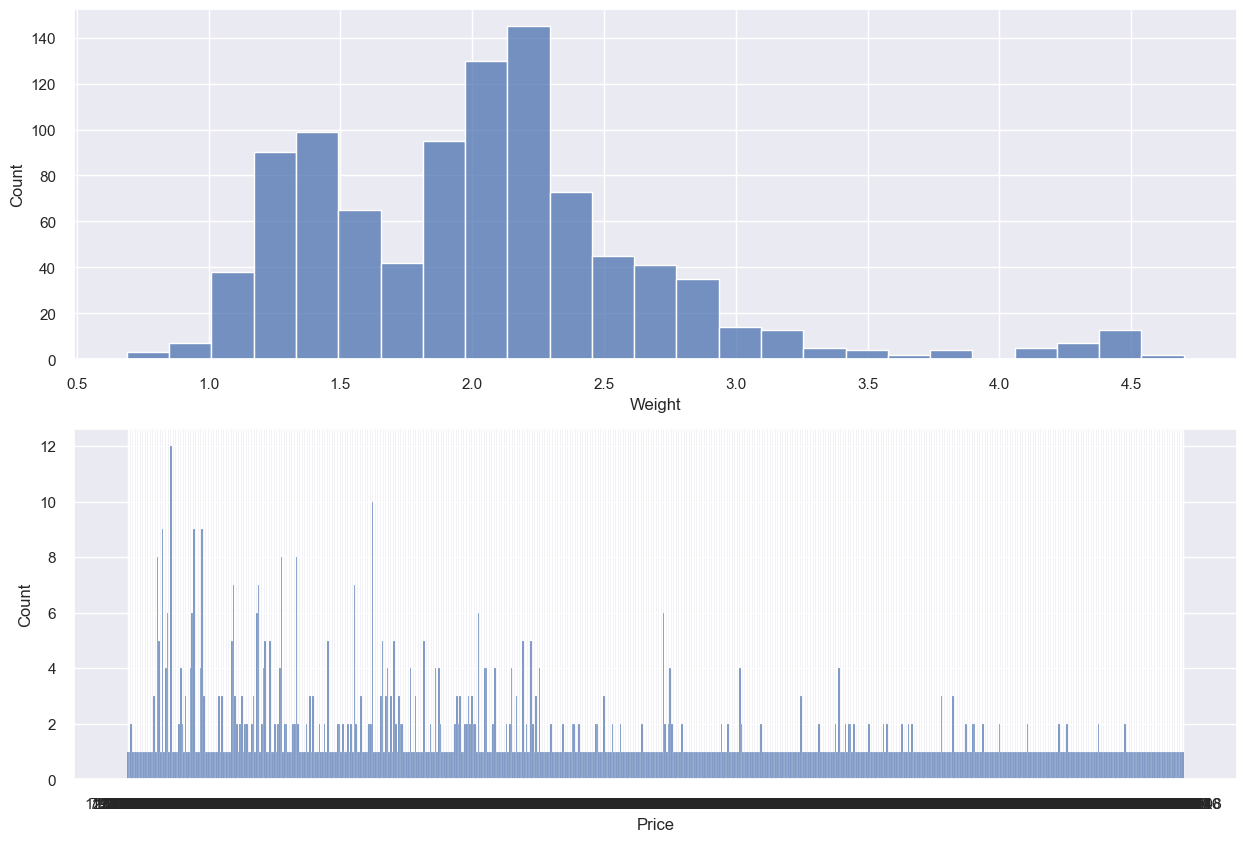

In [34]:
plt.figure(figsize = (15,10))

sns.set(color_codes = True)

plt.subplot(2,1,1)
sns.histplot(df['Weight'], kde = False)

plt.subplot(2,1,2)
sns.histplot(df.Price, kde = False)

#### Here we can see that we have some outliers but we will keep them for now.

<Axes: title={'center': 'Boxplot Weight'}, xlabel='Weight'>

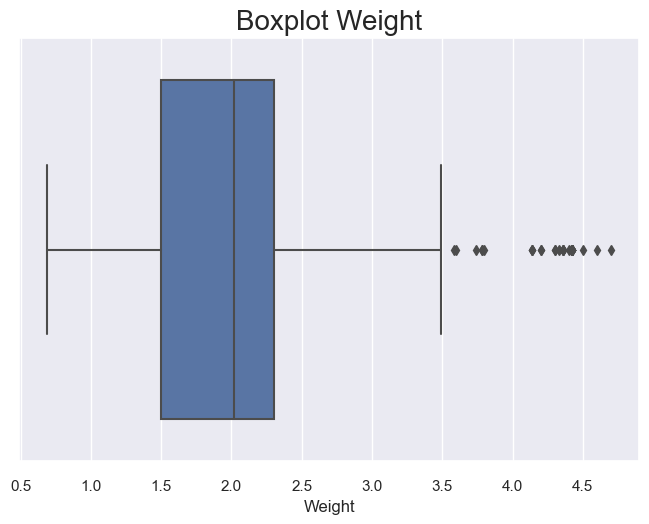

In [35]:
plt.title("Boxplot Weight", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Weight"])

#### Bivariate Analysis.

#### Now looking at our target variable, we can see that gaming computers and workstation computers are the ones with a higher average price, we can also see that the more ram the more expensive the computer generally tends to be, which makes a lot of sense, we can see that Mac computers are generally more expensive than other operating systems.

#### Now looking at the Manufacturer variable we can see that Razer computers are generally much more expensive than others, and when we look at the screen size variable we don't find a pattern.

#### Comparing the Width variable with our target variable, we did not find a defined pattern.

<Axes: xlabel='Weight', ylabel='Price'>

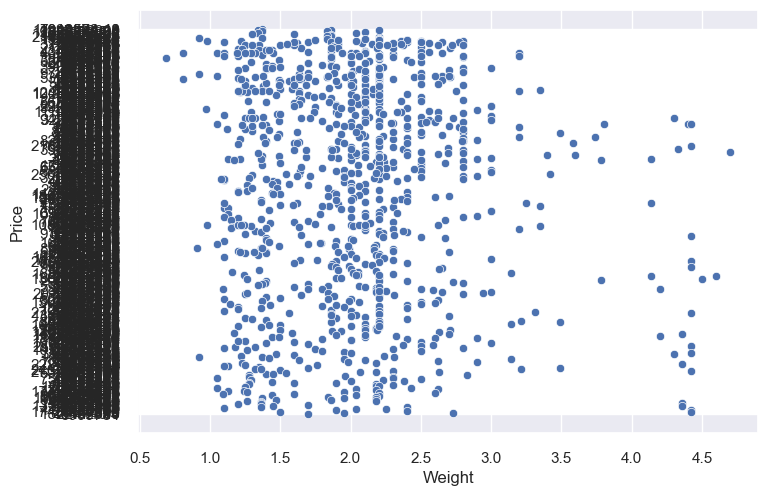

In [39]:
sns.scatterplot(data=df, x="Weight", y="Price")

## <font color='blue'> 3. Model Building </font>

#### Label Encoder
- Here we are going to use the LabelEncoder to transform our categorical variables into numeric variables.

In [40]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Operating System Version,Model_name_avg,CPU_avg,GPU_avg,model_name_group,cpu_group,gpu_group
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,10,17779109.40,12707735.04,15996708.0,2,3,2
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,10,9148267.44,9148267.44,9323262.0,4,4,4
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900,10,3902209.74,7380360.00,9194328.0,4,4,4
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.4,10,17779109.40,22563005.40,22563005.4,2,1,1
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.2,10,17779109.40,17088645.60,17088645.6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42,24897600,10,25511059.08,13880412.00,23839452.0,0,3,1
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,1.95,10492560,10,10492560.00,9429966.00,6126588.0,3,4,4
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73,18227710.8,10,15071940.00,15107508.00,15996708.0,2,2,2
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04,8705268,10,8091720.00,8705268.00,8705268.0,4,4,4


In [41]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
mapping_df = df[['Manufacturer']].copy() #Create an extra dataframe which will be used to address only the encoded values
mapping_df['manufacturer'] = le.fit_transform(df['Manufacturer'].values) 
d1 = mapping_df.drop_duplicates('Manufacturer')
print(d1)

    Manufacturer  manufacturer
0          Apple             1
2             HP             7
5           Acer             0
8           Asus             2
13          Dell             4
18        Lenovo            10
30         Chuwi             3
58           MSI            11
70     Microsoft            13
143      Toshiba            16
170       Huawei             8
184       Xiaomi            18
191         Vero            17
196        Razer            14
429     Mediacom            12
430      Samsung            15
437       Google             6
567      Fujitsu             5
678           LG             9


In [42]:
le1= LabelEncoder()
mapping_df1 = df[['Category']].copy() #Create an extra dataframe which will be used to address only the encoded values
mapping_df1['manufacturer'] = le1.fit_transform(df['Category'].values) 
d11 = mapping_df1.drop_duplicates('Category')
print(d11)

               Category  manufacturer
0             Ultrabook             4
2              Notebook             3
20              Netbook             2
21               Gaming             1
23   2 in 1 Convertible             0
204         Workstation             5


In [43]:
le2= LabelEncoder()
mapping_df2 = df[['Screen Size']].copy() #Create an extra dataframe which will be used to address only the encoded values
mapping_df2['screen Size'] = le2.fit_transform(df['Screen Size'].values) 
d2 = mapping_df2.drop_duplicates('Screen Size')
print(d2)

    Screen Size  screen Size
0         13.3"            7
2         15.6"           14
3         15.4"           13
8         14.0"           10
14        12.0"            3
20        11.6"            2
29        17.3"           16
50        10.1"            0
70        13.5"            8
146       12.5"            5
170       13.0"            6
177       18.4"           17
182       13.9"            9
421       12.3"            4
641       17.0"           15
771       15.0"           12
882       14.1"           11
944       11.3"            1


In [44]:
le3= LabelEncoder()
mapping_df3 = df[['Screen Size']].copy() #Create an extra dataframe which will be used to address only the encoded values
mapping_df3['screen Size'] = le3.fit_transform(df['Screen Size'].values) 
d3 = mapping_df3.drop_duplicates('Screen Size')
print(d3)

    Screen Size  screen Size
0         13.3"            7
2         15.6"           14
3         15.4"           13
8         14.0"           10
14        12.0"            3
20        11.6"            2
29        17.3"           16
50        10.1"            0
70        13.5"            8
146       12.5"            5
170       13.0"            6
177       18.4"           17
182       13.9"            9
421       12.3"            4
641       17.0"           15
771       15.0"           12
882       14.1"           11
944       11.3"            1


In [45]:
le4= LabelEncoder()
mapping_df4 = df[['Screen']].copy() #Create an extra dataframe which will be used to address only the encoded values
mapping_df4['screen'] = le4.fit_transform(df['Screen'].values) 
d4 = mapping_df4.drop_duplicates('Screen')
print(d4.sort_values("screen"))

                                            Screen  screen
5                                         1366x768       0
1                                         1440x900       1
193                                       1600x900       2
663                                      1920x1080       3
438                                      2560x1440       4
186            4K Ultra HD / Touchscreen 3840x2160       5
204                          4K Ultra HD 3840x2160       6
23                 Full HD / Touchscreen 1920x1080       7
2                                Full HD 1920x1080       8
113                             IPS Panel 1366x768       9
385                            IPS Panel 2560x1440      10
146  IPS Panel 4K Ultra HD / Touchscreen 3840x2160      11
200                IPS Panel 4K Ultra HD 3840x2160      12
19       IPS Panel Full HD / Touchscreen 1920x1080      13
323                     IPS Panel Full HD 1366x768      14
9                      IPS Panel Full HD 1920x1080      

In [46]:
le5= LabelEncoder()
mapping_df5 = df[['RAM']].copy() #Create an extra dataframe which will be used to address only the encoded values
mapping_df5['ram'] = le5.fit_transform(df['RAM'].values) 
d5 = mapping_df5.drop_duplicates('RAM')
print(d5.sort_values("ram"))

      RAM  ram
44   12GB    0
3    16GB    1
438  24GB    2
20    2GB    3
177  32GB    4
5     4GB    5
98    6GB    6
0     8GB    7


In [47]:
le6= LabelEncoder()
mapping_df6 = df[[' Storage']].copy() #Create an extra dataframe which will be used to address only the encoded values
mapping_df6['storage'] = le6.fit_transform(df[' Storage'].values) 
d6 = mapping_df6.drop_duplicates(' Storage')
print(d6.sort_values("storage"))

                           Storage  storage
1              128GB Flash Storage        0
839                      128GB HDD        1
0                        128GB SSD        2
21            128GB SSD +  1TB HDD        3
245           128GB SSD +  2TB HDD        4
317             16GB Flash Storage        5
290                       16GB SSD        6
477                        1GB SSD        7
18                         1TB HDD        8
703             1TB HDD +  1TB HDD        9
151                     1TB Hybrid       10
190                        1TB SSD       11
723             1TB SSD +  1TB HDD       12
911                      240GB SSD       13
6              256GB Flash Storage       14
2                        256GB SSD       15
41            256GB SSD +  1TB HDD       16
28          256GB SSD +  256GB SSD       17
58            256GB SSD +  2TB HDD       18
228         256GB SSD +  500GB HDD       19
76                         2TB HDD       20
20              32GB Flash Stora

In [48]:
le7= LabelEncoder()
mapping_df7 = df[['Operating System']].copy() #Create an extra dataframe which will be used to address only the encoded values
mapping_df7['operating System'] = le7.fit_transform(df['Operating System'].values) 
d7 = mapping_df7.drop_duplicates('Operating System')
print(d7.sort_values("operating System"))

    Operating System  operating System
50           Android                 0
290        Chrome OS                 1
36             Linux                 2
6             Mac OS                 3
2              No OS                 4
5            Windows                 5
0              macOS                 6


In [49]:
le8= LabelEncoder()
mapping_df8 = df[['Operating System Version']].copy() #Create an extra dataframe which will be used to address only the encoded values
mapping_df8['operating System Version'] = le8.fit_transform(df['Operating System Version'].values) 
d8 = mapping_df8.drop_duplicates('Operating System Version')
print(d8)

    Operating System Version  operating System Version
0                         10                         0
6                          X                         3
70                      10 S                         1
525                        7                         2


In [61]:
df = df.drop(['Model Name', 'CPU', 'GPU', 'Model_name_avg', 'CPU_avg', 'GPU_avg'], axis = 1)
df_test = df_test.drop(['Model Name', 'CPU', 'GPU', 'Model_name_avg', 'CPU_avg', 'GPU_avg'], axis = 1)

In [62]:
from sklearn.preprocessing import LabelEncoder

label_encoder_Manufacturer = LabelEncoder()
label_encoder_Category = LabelEncoder()
label_encoder_Screen_Size = LabelEncoder()
label_encoder_Screen = LabelEncoder()
label_encoder_RAM = LabelEncoder()
label_encoder_Storage = LabelEncoder()
label_encoder_Operating_System = LabelEncoder()
label_encoder_Operating_System_Version = LabelEncoder()

df['Manufacturer'] = label_encoder_Manufacturer.fit_transform(df['Manufacturer'])
df['Category'] = label_encoder_Category.fit_transform(df['Category'])
df['Screen Size'] = label_encoder_Screen_Size.fit_transform(df['Screen Size'])
df['Screen'] = label_encoder_Screen.fit_transform(df['Screen'])
df['RAM'] = label_encoder_RAM.fit_transform(df['RAM'])
df[' Storage'] = label_encoder_Storage.fit_transform(df[' Storage'])
df['Operating System'] = label_encoder_Operating_System.fit_transform(df['Operating System'])
df['Operating System Version'] = label_encoder_Operating_System_Version.fit_transform(df['Operating System Version'])

df_test['Manufacturer'] = label_encoder_Manufacturer.fit_transform(df_test['Manufacturer'])
df_test['Category'] = label_encoder_Category.fit_transform(df_test['Category'])
df_test['Screen Size'] = label_encoder_Screen_Size.fit_transform(df_test['Screen Size'])
df_test['Screen'] = label_encoder_Screen.fit_transform(df_test['Screen'])
df_test['RAM'] = label_encoder_RAM.fit_transform(df_test['RAM'])
df_test[' Storage'] = label_encoder_Storage.fit_transform(df_test[' Storage'])
df_test['Operating System'] = label_encoder_Operating_System.fit_transform(df_test['Operating System'])
df_test['Operating System Version'] = label_encoder_Operating_System_Version.fit_transform(df_test['Operating System Version'])

#### Separating into features variables and target variable.

In [63]:
X_train = df.drop('Price', axis = 1)
X_train = X_train.values
y_train = df['Price']
X_test = df_test.drop('Price', axis = 1)
X_test = X_test.values
y_test = df_test['Price']

In [52]:
gfg_csv_data = df.to_csv('GfG23.csv', index = True)

In [64]:
df

,Manufacturer,Category,Screen Size,Screen,RAM,Storage,Operating System,Weight,Price,Operating System Version,model_name_group,cpu_group,gpu_group
0,1,4,7,23,7,2,6,1.37,11912523.48,0,2,3,2
1,1,4,7,1,7,0,6,1.34,7993374.48,0,4,4,4
2,7,3,14,8,7,15,4,1.86,5112900,0,4,4,4
3,1,4,13,25,1,27,6,1.83,22563005.4,0,2,1,1
4,1,4,7,23,7,15,6,1.37,16037611.2,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,4,1,16,8,4,16,5,4.42,24897600,0,0,3,1
973,16,3,10,8,7,15,5,1.95,10492560,0,3,4,4
974,2,1,16,8,1,16,5,2.73,18227710.8,0,2,2,2
975,7,3,14,15,7,3,5,2.04,8705268,0,4,4,4


#### StandardScaler
- Here we will use StandardScaler to put our data in the same scale.

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard_train = scaler.fit_transform(X_train)
y_standard_train = scaler.fit_transform(y_train.values.reshape(-1,1))
X_standard_test = scaler.fit_transform(X_test)
y_standard_test = scaler.fit_transform(y_test.values.reshape(-1,1))

#### Linear Regression
- Here we will use the Linear Regression Model.

#### In the Linear Regression model we had 79,35% accuracy, that is a good model, when we look at our error, we had 1953117 in the MAE and 2696368 in the MRSE.

In [66]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_normal_score_train = lr_model.score(X_train, y_train)
lr_normal_score_test = lr_model.score(X_test, y_test)
previsoes = lr_model.predict(X_test)
mae_lr_normal = mean_absolute_error(y_test, previsoes)
rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))

print('Train :', lr_normal_score_train)
print('Test :', lr_normal_score_test)
print('Mean Absolute Error :', mae_lr_normal)
print('Root Mean Square Error :', rmse_lr_normal)

Train : 0.8387595187152533
Test : 0.7268532215684409
Mean Absolute Error : 2452434.8079721644
Root Mean Square Error : 3101347.905349838


In [67]:
lr_model.predict([[1,4,7,23,7,2,6,0,1.37,2,3,2]])

array([19571648.02221322])

#### Polynomial Regression

#### In the Polynomial Regression model we had 74,30% accuracy, that isn't a good model, when we look at our error, we had 2287249 in the MAE and 3008007 in the MRSE.

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
lr_poly_normal_score_train = lr_poly.score(X_poly_train, y_train)
lr_poly_normal_score_test = lr_poly.score(X_poly_test, y_test)
previsoes = lr_poly.predict(X_poly_test)
mae_poly_normal = mean_absolute_error(y_test, previsoes)
rmse_poly_normal = np.sqrt(mean_squared_error(y_test, previsoes))

print('Train :', lr_poly_normal_score_train)
print('Test :', lr_poly_normal_score_test)
print('Mean Absolute Error :', mae_poly_normal)
print('Root Mean Square Error :', rmse_poly_normal)

Train : 0.8972342410653222
Test : -0.326956520600048
Mean Absolute Error : 4714699.049521389
Root Mean Square Error : 6835665.344299828


In [69]:
lr_poly.predict([[1.    ,   1.    ,   4.    ,   7.    ,  23.    ,   7.    ,
         2.    ,   6.    ,   0.    ,   1.37  ,   2.    ,   3.    ,
         2.    ,   1.    ,   4.    ,   7.    ,  23.    ,   7.    ,
         2.    ,   6.    ,   0.    ,   1.37  ,   2.    ,   3.    ,
         2.    ,  16.    ,  28.    ,  92.    ,  28.    ,   8.    ,
        24.    ,   0.    ,   5.48  ,   8.    ,  12.    ,   8.    ,
        49.    , 161.    ,  49.    ,  14.    ,  42.    ,   0.    ,
         9.59  ,  14.    ,  21.    ,  14.    , 529.    , 161.    ,
        46.    , 138.    ,   0.    ,  31.51  ,  46.    ,  69.    ,
        46.    ,  49.    ,  14.    ,  42.    ,   0.    ,   9.59  ,
        14.    ,  21.    ,  14.    ,   4.    ,  12.    ,   0.    ,
         2.74  ,   4.    ,   6.    ,   4.    ,  36.    ,   0.    ,
         8.22  ,  12.    ,  18.    ,  12.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   1.8769,   2.74  ,   4.11  ,
         2.74  ,   4.    ,   6.    ,   4.    ,   9.    ,   6.    ,
         4. ]])

array([13256305.52730281])

#### Decision Tree
- Here we are applying GridSearch to check which are the best metrics to use.

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeRegressor()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  7
Algorithm:  friedman_mse
Score:  0.8475255863350772


C:\Users\mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mohit\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\mohit\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 198, in fit
    if np.any(y < 0):
TypeError: '<' not supported between instances of 'str' and 'int'

  warnings

#### Running the Model.

#### In the Decision Tree model we had 66,02% accuracy, which isn't a good number, when we look at our error, we had 2201542 in the MAE and 3458846 in the MRSE.

In [71]:
decision_tree = DecisionTreeRegressor(min_samples_split = 2, max_depth = 5, criterion = 'squared_error')
decision_tree.fit(X_train, y_train)
lr_normal_decision_tree = decision_tree.score(X_train, y_train)
lr_normal_decision_tree_test = decision_tree.score(X_test, y_test)
previsoes = decision_tree.predict(X_test)
mae_lr_normal_decision_tree  = mean_absolute_error(y_test, previsoes)
rmse_lr_normal_decision_tree = np.sqrt(mean_squared_error(y_test, previsoes))

print('Train :', lr_normal_decision_tree)
print('Test :', lr_normal_decision_tree_test)
print('Mean Absolute Error :', mae_lr_normal_decision_tree)
print('Root Mean Square Error :', rmse_lr_normal_decision_tree)

Train : 0.9238538651561272
Test : 0.6477294704565811
Mean Absolute Error : 2284923.608996895
Root Mean Square Error : 3522010.1430298537


In [72]:
decision_tree.predict([[1,4,7,23,7,2,6,0,1.37,2,3,2]])


array([15073928.35])

#### Checking the most important variables of the model

In [73]:
columns = df.drop('Price', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

model_name_group            0.848461
RAM                         0.076982
cpu_group                   0.036268
Screen                      0.013281
 Storage                    0.006985
Operating System            0.005402
Weight                      0.004791
Category                    0.004259
gpu_group                   0.002786
Manufacturer                0.000785
Screen Size                 0.000000
Operating System Version    0.000000
dtype: float64

#### Random Forest
- Here we will use the Random Forest Model, we will test squared_error, absolute_error and friedman_mse calculations.
- Applying GridSearch

In [74]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators': [100],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse']
             }

model = RandomForestRegressor()
gridRandomForest = RandomizedSearchCV(model,parameters, cv = 2)
gridRandomForest.fit(X_train, y_train.ravel())

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  absolute_error
Score:  0.8778099674047901
Mín Split:  5
Max Nvl:  9


#### Running Random Forest

#### In the Random Forest model we had 81,80% accuracy, which is a good number, when we look at our error, we had 1816206 in the MAE and 2531400 in the MRSE.

In [75]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, 
max_depth= 7,  criterion = 'squared_error', random_state = 0)
regressor_rf.fit(X_train, y_train)
lr_normal_rf = regressor_rf.score(X_train, y_train)
lr_normal_rf_test = regressor_rf.score(X_test, y_test)
previsoes = regressor_rf.predict(X_test)
mae_lr_normal_rf  = mean_absolute_error(y_test, previsoes)
rmse_lr_normal_rf = np.sqrt(mean_squared_error(y_test, previsoes))

print('Train :', lr_normal_rf)
print('Test :', lr_normal_rf_test)
print('Mean Absolute Error :', mae_lr_normal_rf)
print('Root Mean Square Error :', rmse_lr_normal_rf)

Train : 0.9575609011041503
Test : 0.8025786870101907
Mean Absolute Error : 1940632.474126367
Root Mean Square Error : 2636631.6693497477


In [76]:
 regressor_rf.predict([[1,4,7,23,7,2,6,0,1.37,2,3,2]])

array([14263987.01366005])

#### Checking the most important variables of the model.

In [77]:
feature_imp_random = pd.Series(regressor_rf.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

model_name_group            0.812487
RAM                         0.056303
cpu_group                   0.041566
Screen                      0.027737
Weight                      0.016567
 Storage                    0.014104
Manufacturer                0.012993
gpu_group                   0.008836
Operating System            0.003386
Category                    0.002992
Screen Size                 0.001952
Operating System Version    0.001078
dtype: float64

#### Checking the Results

In [78]:
linear_regression = {'Model':'Linear Regression',
               'Score Train':lr_normal_score_train,
               'Score Test':lr_normal_score_test,
               'MSE':mae_lr_normal,
               'RMSE':rmse_lr_normal,}

polynomial_regression = {'Model':'Polynomial Regression',
               'Score Train':lr_poly_normal_score_train,
               'Score Test':lr_poly_normal_score_test,
               'MSE':mae_poly_normal,
               'RMSE':rmse_poly_normal,}

decision_tree = {'Model':'Decision Tree',
               'Score Train':lr_normal_decision_tree,
               'Score Test':lr_normal_decision_tree_test,
               'MSE':mae_lr_normal_decision_tree,
               'RMSE':rmse_lr_normal_decision_tree,}

random_forest = {'Model':'Random Forest',
               'Score Train':lr_normal_rf,
               'Score Test':lr_normal_rf_test,
               'MSE':mae_lr_normal_rf,
               'RMSE':rmse_lr_normal_rf,}



In [80]:
resume = pd.DataFrame({'Linear Regression':pd.Series(linear_regression),
                       'Polynomial Regression':pd.Series(polynomial_regression),
                       'Decision Tree':pd.Series(decision_tree),
                       'Random Forest':pd.Series(random_forest),
                       
                      })

In [81]:
resume

,Linear Regression,Polynomial Regression,Decision Tree,Random Forest
Model,Linear Regression,Polynomial Regression,Decision Tree,Random Forest
Score Train,0.83876,0.897234,0.923854,0.957561
Score Test,0.726853,-0.326957,0.647729,0.802579
MSE,2452434.807972,4714699.049521,2284923.608997,1940632.474126
RMSE,3101347.90535,6835665.3443,3522010.14303,2636631.66935
